In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Categorical Features:

Sex,
Smoker,
Region.

### EDA

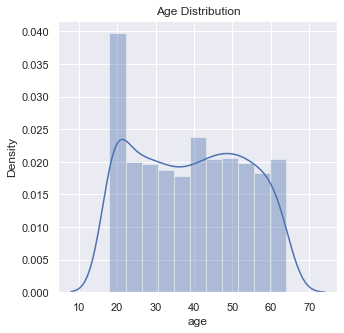

In [8]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df["age"])
plt.title('Age Distribution')
plt.show()

In [9]:
df["sex"].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

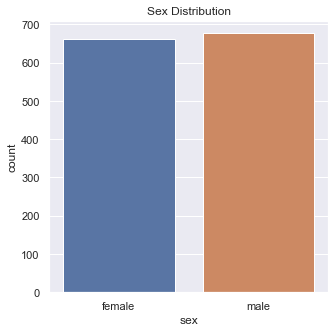

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(df["sex"])
plt.title('Sex Distribution')
plt.show()

In [11]:
df["children"].value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

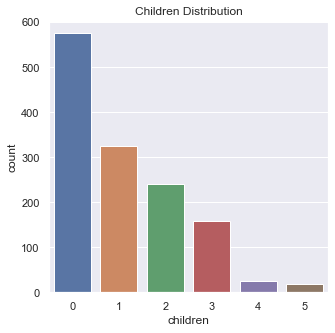

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(df["children"])
plt.title('Children Distribution')
plt.show()

In [13]:
df["smoker"].value_counts(normalize = True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

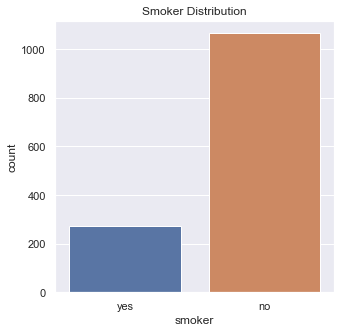

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df["smoker"])
plt.title('Smoker Distribution')
plt.show()

In [15]:
df["region"].value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

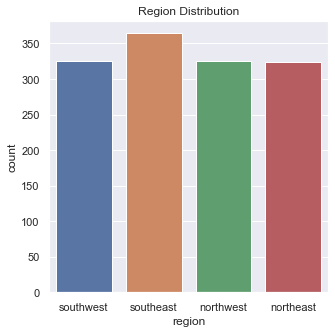

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(df["region"])
plt.title('Region Distribution')
plt.show()

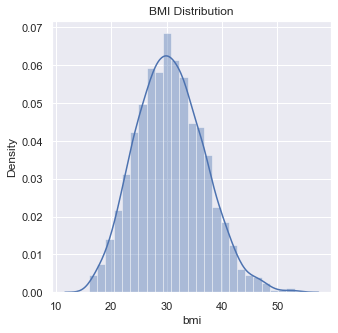

In [17]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df["bmi"])
plt.title('BMI Distribution')
plt.show()

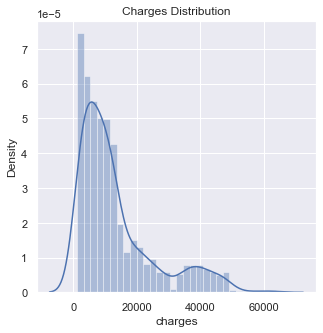

In [18]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df["charges"])
plt.title('Charges Distribution')
plt.show()

### Encoding the categorical features

In [19]:
df["sex"].replace({"male":0,"female":1},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [20]:
df["smoker"].replace({"yes":0,"no":1},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [21]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df["region"].replace({"southeast":0,"southwest":1,"northeast":2,"northwest":3},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Splitting the Features and Target

In [23]:
X= df.drop(["charges"],axis = 1)
y = df["charges"]

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting the data into Training data & Testing Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


### Model Training

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

### on training dataset

In [32]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_train,y_train_pred)

0.751505643411174

### on test dataset

In [35]:
y_test_pred = lr.predict(X_test)
y_test_pred[:5]

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035])

In [36]:
r2_score(y_test,y_test_pred)

0.7447273869684077

### Predicting new data

In [37]:
input_data = (31,1,25.74,0,1,0)

In [38]:
input_data_np_array = np.array(input_data)
input_data_np_array_reshaped = input_data_np_array.reshape(1,-1)
input_data_np_array_reshaped

array([[31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ]])

In [39]:
input_data_np_array

array([31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ])

In [40]:
prediction = lr.predict(input_data_np_array_reshaped)
prediction

array([3760.0805765])

In [41]:
print(f"The insurance cost is : {prediction[0]:0.2f}")

The insurance cost is : 3760.08
